# **КЛАССИФИКАЦИЯ (РАЗБИЕНИЕ СТАТЕЙ/СЛОВ НА КАТЕГОРИИ)**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D
from keras import utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv -O train.csv
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv -O test.csv
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt -O classes.txt

! head train.csv

--2022-04-24 07:26:09--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2022-04-24 07:26:09--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  75.8MB/s    in 0.4s    

2022-04-24 07:26:10 (75.8 MB/s) - ‘train.csv’ saved [29470338/29470338]

--2022-

In [3]:
# Категории: "Общее", "Спорт", "Бизнес"
df = pd.read_csv('train.csv', header=None, names=['category', 'title', 'text'])
X_train = df['text']

y_train = tf.keras.utils.to_categorical(df['category'] - 1, 4)

In [4]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=30)

In [5]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=30))
model.add(Conv1D(250, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 392,894
Trainable params: 392,894
Non-trainable params: 0
__________________________________________________

In [6]:
tf.config.run_functions_eagerly(True)
hist = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)
model.save('aboba_net.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


844/844 [==============================] - 49s 47ms/step - loss: 0.4325 - accuracy: 0.8462 - val_loss: 0.3171 - val_accuracy: 0.8851
Epoch 2/10
844/844 [==============================] - 27s 31ms/step - loss: 0.2471 - accuracy: 0.9157 - val_loss: 0.3231 - val_accuracy: 0.8822
Epoch 3/10
844/844 [==============================] - 27s 32ms/step - loss: 0.1940 - accuracy: 0.9323 - val_loss: 0.3408 - val_accuracy: 0.8813
Epoch 4/10
844/844 [==============================] - 26s 31ms/step - loss: 0.1429 - accuracy: 0.9501 - val_loss: 0.3869 - val_accuracy: 0.8759
Epoch 5/10
844/844 [==============================] - 28s 34ms/step - loss: 0.0932 - accuracy: 0.9686 - val_loss: 0.4716 - val_accuracy: 0.8718
Epoch 6/10
844/844 [==============================] - 27s 31ms/step - loss: 0.0607 - accuracy: 0.9804 - val_loss: 0.5469 - val_accuracy: 0.8676
Epoch 7/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.6389 - val_accuracy: 0.8683
Epo

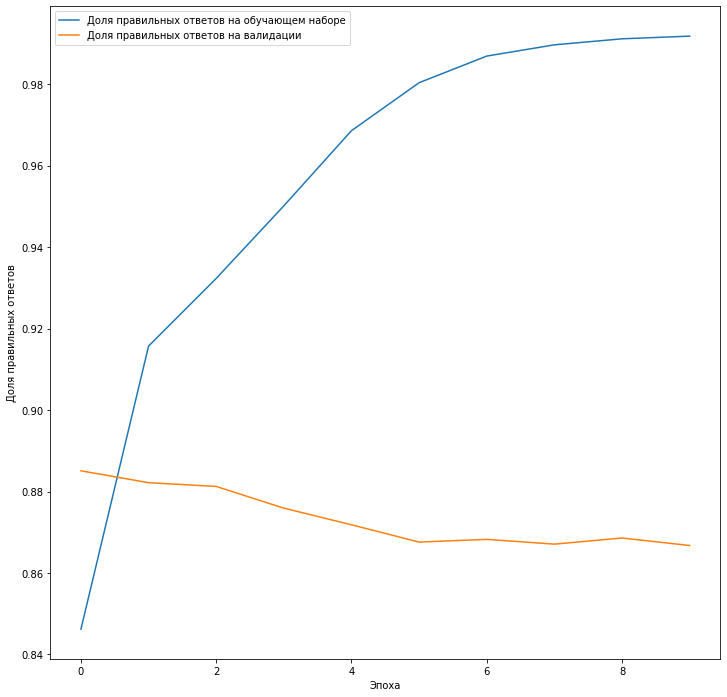

In [7]:
plt.figure(figsize=(12, 12))
plt.plot(hist.history['accuracy'], label='Доля правильных ответов на обучающем наборе')
plt.plot(hist.history['val_accuracy'], label='Доля правильных ответов на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()